<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Simulated-curve" data-toc-modified-id="Simulated-curve-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Simulated curve</a></span><ul class="toc-item"><li><span><a href="#Import-curve" data-toc-modified-id="Import-curve-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import curve</a></span><ul class="toc-item"><li><span><a href="#Generate-a-curve-if-it-is-not-available-yet" data-toc-modified-id="Generate-a-curve-if-it-is-not-available-yet-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Generate a curve if it is not available yet</a></span></li><li><span><a href="#Otherwise-import-the-curve-from-its-coordinates" data-toc-modified-id="Otherwise-import-the-curve-from-its-coordinates-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Otherwise import the curve from its coordinates</a></span></li></ul></li><li><span><a href="#Setting-parameters" data-toc-modified-id="Setting-parameters-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Setting parameters</a></span></li><li><span><a href="#Effect-of-sampling-sizes" data-toc-modified-id="Effect-of-sampling-sizes-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Effect of sampling sizes</a></span></li></ul></li><li><span><a href="#Neuron" data-toc-modified-id="Neuron-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Neuron</a></span></li></ul></div>

Check the effect of sampling rate on the calculation of local 3d scale.

In [1]:
import numpy as np
import seaborn as sns
from genepy3d.obj import curves
from genepy3d.io import swc
from genepy3d.util import geo, plot as mypl

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
%matplotlib notebook

# Simulated curve

## Import curve

### Generate a curve if it is not available yet

### Otherwise import the curve from its coordinates

In [3]:
coors = np.load('../data/validation/simulation/curve_coors_samplingstudy.npy')
crv = curves.Curve(coors)
print('Number of points:',crv.nb_of_points)
print('Lenght:',crv.compute_length())
print('Sampling size:',int(crv.compute_length()/crv.nb_of_points))

Number of points: 100
Lenght: 816.5949738738437
Sampling size: 8


<IPython.core.display.Javascript object>


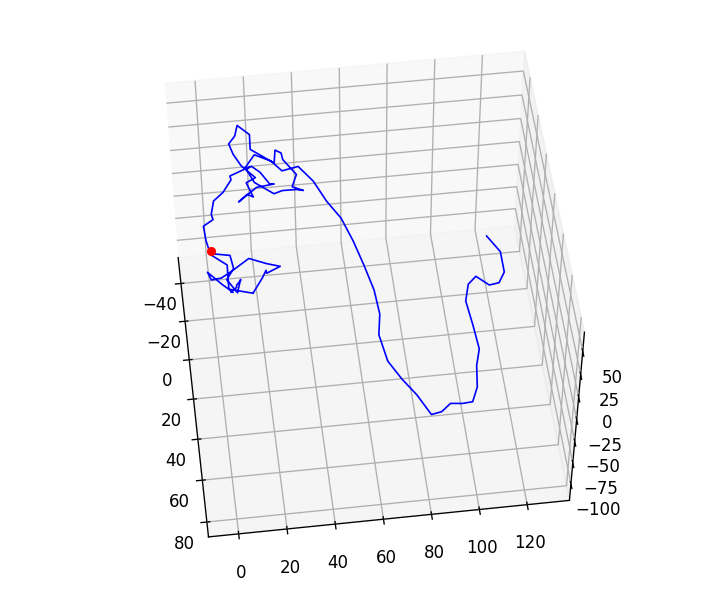

In [4]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111,projection='3d')
crv.plot(ax);
ax.view_init(azim=-7,elev=51)
plt.tight_layout();

## Setting parameters

In [101]:
# List of scales within it the local 3d scale is computed
rmin = 1
rmax = 100
rstep = 3
r_lst = np.arange(rmin,rmax+rstep,rstep)
print('Scales')
print(r_lst)

# Parameters
lmin = 3
sig_step = 1
eps_kappa = 0.01
eps_tau = 0.01
eps_crv_len = lmin
eps_seg_len = lmin

# Sampling size
sampling_lst = np.arange(5,12,1)
print('Sampling sizes')
print(sampling_lst)

Scales
[  1   4   7  10  13  16  19  22  25  28  31  34  37  40  43  46  49  52
  55  58  61  64  67  70  73  76  79  82  85  88  91  94  97 100]
Sampling sizes
[ 5  6  7  8  9 10 11]


## Effect of sampling sizes

<IPython.core.display.Javascript object>


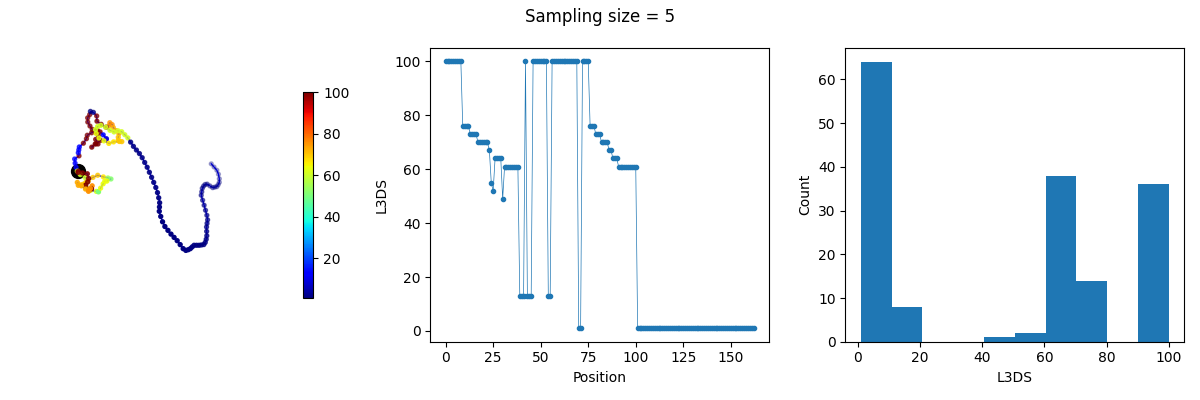

Sampling size: 5
Nb. of points: 163
Length: 759.708025463207


<IPython.core.display.Javascript object>


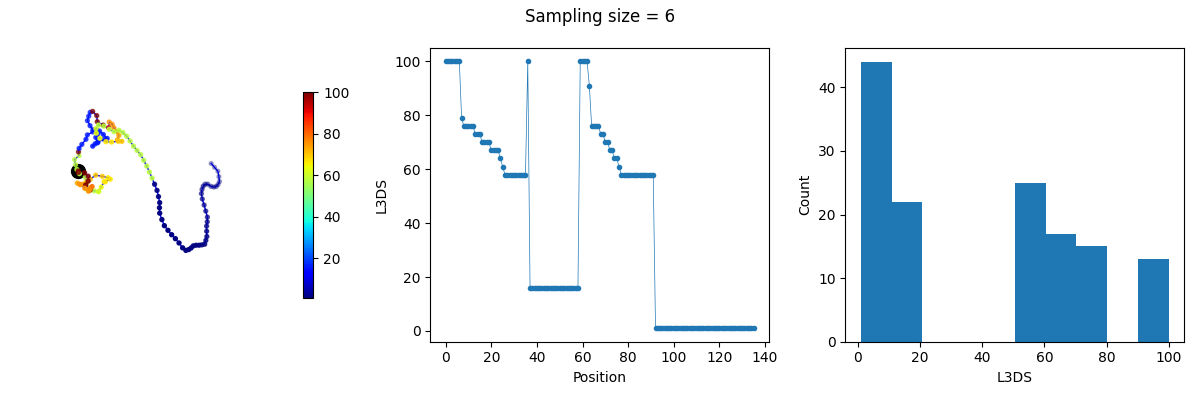

Sampling size: 6
Nb. of points: 136
Length: 751.6502715698332


<IPython.core.display.Javascript object>


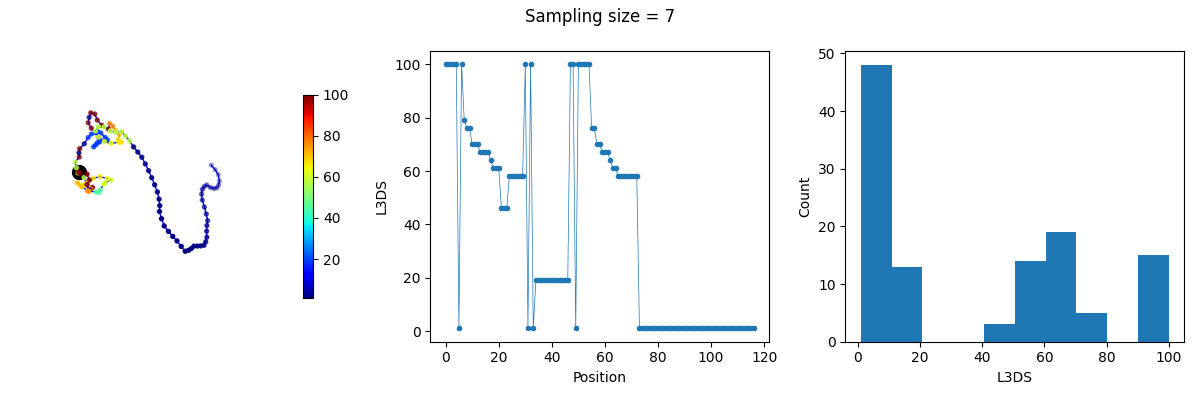

Sampling size: 7
Nb. of points: 117
Length: 734.8249069280577


<IPython.core.display.Javascript object>


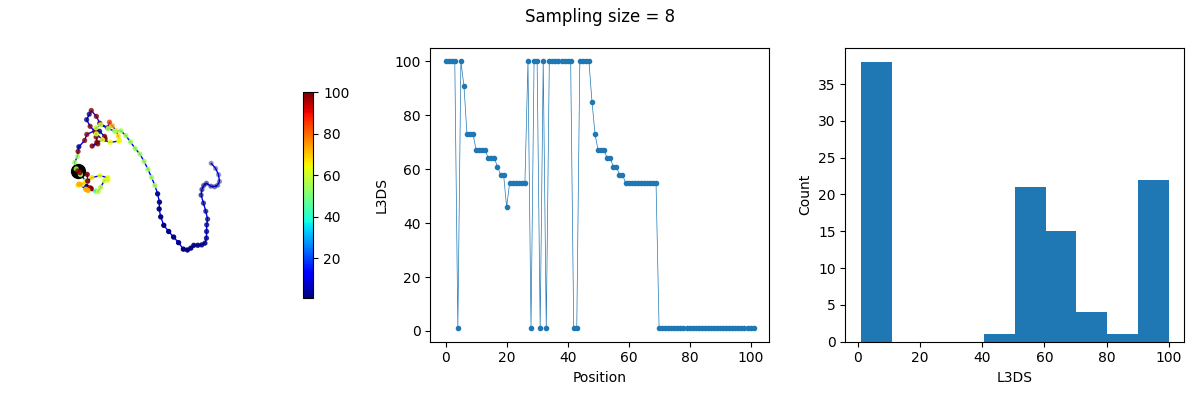

Sampling size: 8
Nb. of points: 102
Length: 722.715066733559


<IPython.core.display.Javascript object>


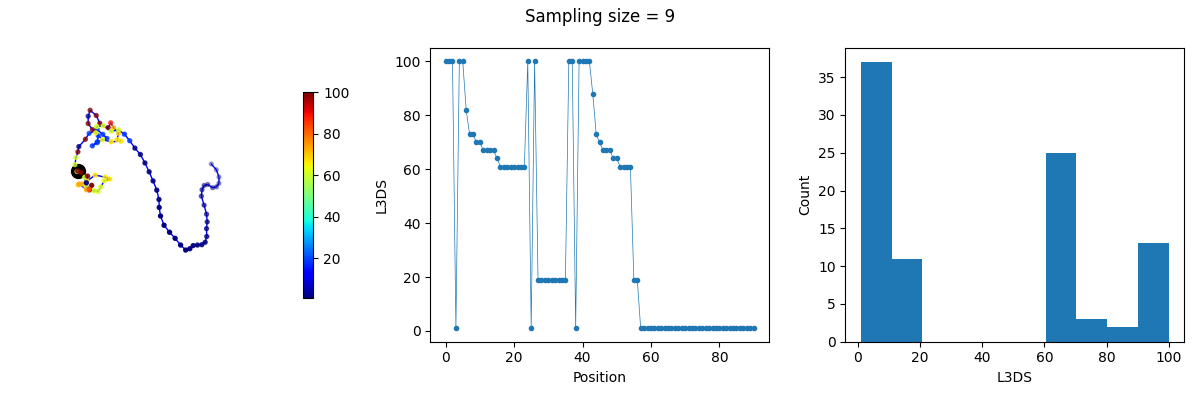

Sampling size: 9
Nb. of points: 91
Length: 728.5578976342326


<IPython.core.display.Javascript object>


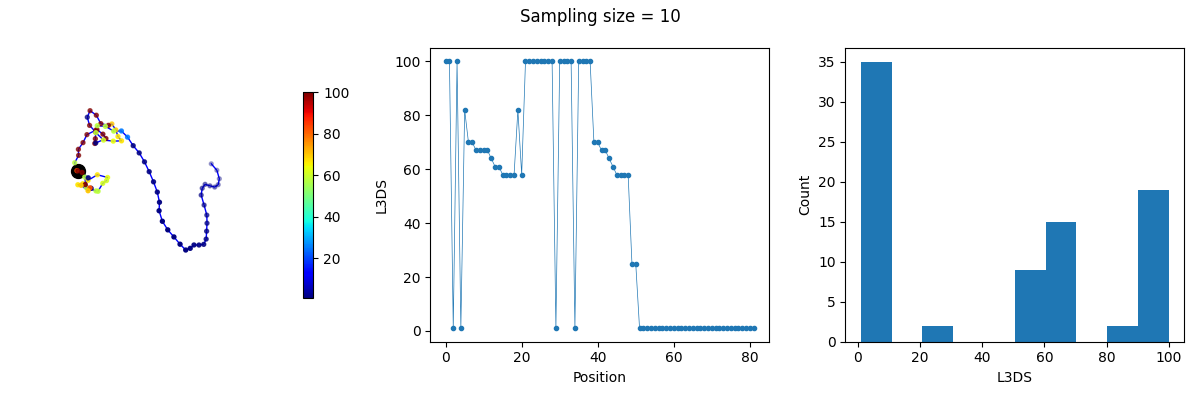

Sampling size: 10
Nb. of points: 82
Length: 710.3342347090944


<IPython.core.display.Javascript object>


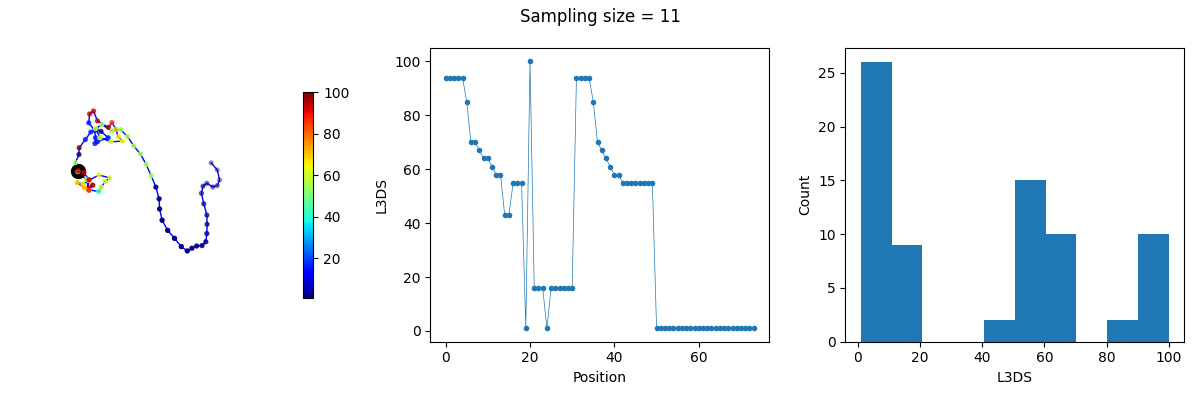

Sampling size: 11
Nb. of points: 74
Length: 713.9629953797772


In [104]:
for ssize in sampling_lst:
    
    fig = plt.figure(figsize=(12,4))
    
    print('Sampling size:',ssize)
    
    # Resample the curve
    crvr = crv.resample(unit_length=ssize)
    print('Nb. of points:',crvr.nb_of_points)
    print('Length:',crvr.compute_length())

    # Local 3D scale
    l3ds = crvr.compute_local_3d_scale(r_lst,eps_seg_len,eps_crv_len,sig_step,eps_kappa,eps_tau)

#     ax = fig.add_subplot(1,3,it,projection='3d')
#     crvr.plot(ax,point_args={'c':'r','s':5},root_args={'c':'k','s':80});
#     ax.view_init(azim=-7,elev=51)
#     ax.axis('off');

    ax = fig.add_subplot(1,3,1,projection="3d")
    _, point_pl, _ = crvr.plot(ax,point_args={"c":l3ds,"cmap":"jet","s":8,'vmin':rmin,'vmax':rmax},root_args={'c':'k','s':100,'zorder':1000})
    fig.colorbar(point_pl,shrink=0.7);
    ax.view_init(azim=-7,elev=51)
    ax.axis('off');

    ax = fig.add_subplot(1,3,2)
    ax.plot(range(len(l3ds)),l3ds,'-o',ms=3,lw=0.5);
    ax.set_ylim(rmin-5,rmax+5);
    ax.set_xlabel('Position')
    ax.set_ylabel('L3DS');
    
    ax = fig.add_subplot(1,3,3)
    ax.hist(l3ds,bins=10);
    ax.set_xlabel('L3DS');
    ax.set_ylabel('Count');
    
    plt.suptitle('Sampling size = {}'.format(ssize))
    plt.tight_layout();
    fig.savefig('localfiles/sampling_size_effect/simulated_curve/ssize_{}.png'.format(ssize),dpi=500)

Observation:
- L3DS can vary by different sampling rate but with a small rate of change.

# Neuron

In [5]:
# Initialize swc importer
filepath = "../data/validation/celltypes/swc/"
f = swc.SWC(filepath,recursive=True)
print("nb. of imported neurons:",len(f.get_neuron_id()))

nb. of imported neurons: 16


In [6]:
# List of neuron names and IDs
f.get_neuron_id()

052317_ECA.CNG                                     0
060415B_ECA.CNG                                    1
101017C_ECA.CNG                                    2
230-12-NBSS.CNG                                    3
231-7-NBSS.CNG                                     4
3817_CPi_PHAL_Z001_app2_split_32.CNG               5
3817_CPi_PHAL_Z001_app2_split_34.CNG               6
5th-instar-LGMD1.CNG                               7
AA0116.CNG                                         8
Badea2011Fig2Ca-R.CNG                              9
c11571.CNG                                        10
CA2-W-P13.CNG                                     11
Purkinje-slice-ageP43-6.CNG                       12
SDB130731c4-hippocampal-CA1-pyramidal-cell.CNG    13
SDB140319c4-hippocampal-CA1-pyramidal-cell.CNG    14
VS1-cobalt.CNG                                    15
dtype: int64

In [8]:
# Select a neuron
neuname = "Badea2011Fig2Ca-R.CNG"
neuid = f.get_neuron_id()[neuname]
print('Neuron name:',neuname)
print("Neuron ID:",neuid)

# Get neuron from ID
neuron = f.get_neurons(neuid)

# Get spine branch
spine_nodes = neuron.compute_spine()
spine_nbnodes = len(spine_nodes)
spine_length = neuron.compute_length(spine_nodes)
print('Spine branch:')
print('>Number of nodes =',spine_nbnodes)
print('>Length =',spine_length)
print('>Original sampling size =',int(spine_length/spine_nbnodes))

lmin = 10 # exclude branch smaller than "lmin"
# ssize_lst = np.arange(1,10) # resampling size
ssize_lst = [1,3,6,9,11] # resampling size
print('List of sampling size:',ssize_lst)

# Parameters of intrinsic dimension decomposition
dim_param = {
    "lmin":lmin,
    "sig_step":1,
    "eps_kappa":0.01,
    "eps_tau":0.01,
    "eps_crv_len":lmin,
    "eps_seg_len":lmin
}

# Scale range
rmin, rmax = 1, int(spine_length/3)
rstep = 5
r_lst = np.arange(rmin,rmax+rstep,rstep)
print('Scale list:',r_lst)

# Prune small leaves
neuron_pruned = neuron.prune_leaves(length=lmin)

Neuron name: Badea2011Fig2Ca-R.CNG
Neuron ID: 9
Spine branch:
>Number of nodes = 75
>Length = 482.647298358928
>Original sampling size = 6
List of sampling size: [1, 3, 6, 9, 11]
Scale list: [  1   6  11  16  21  26  31  36  41  46  51  56  61  66  71  76  81  86
  91  96 101 106 111 116 121 126 131 136 141 146 151 156 161]


<IPython.core.display.Javascript object>


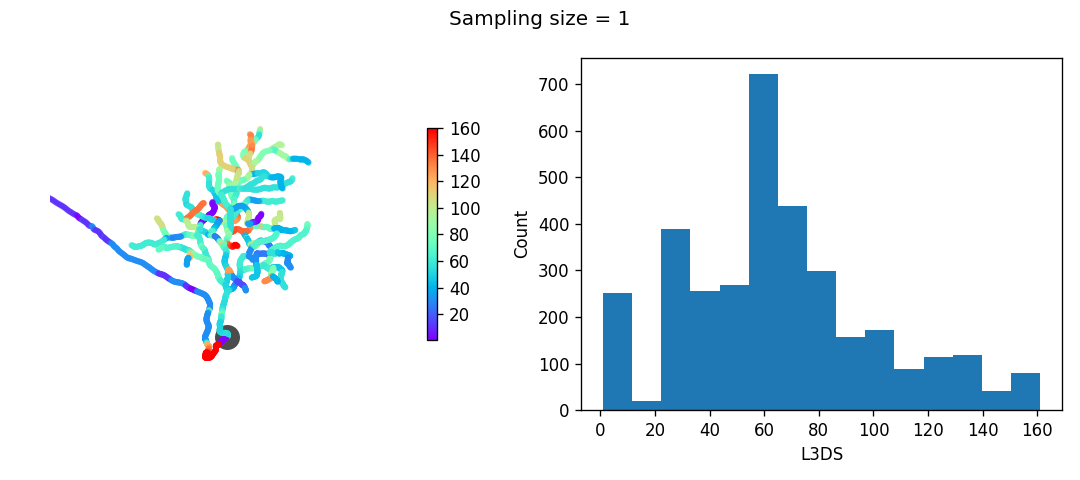

<IPython.core.display.Javascript object>


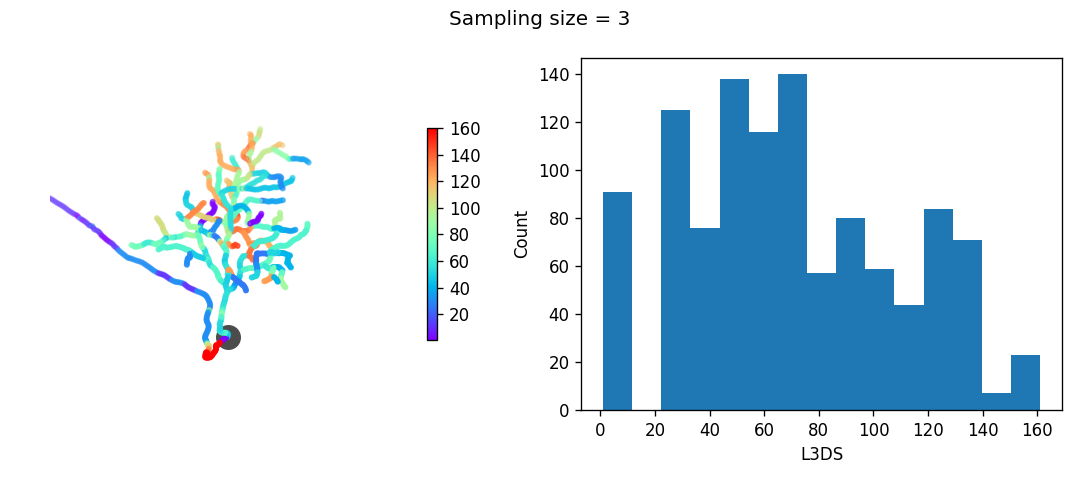

<IPython.core.display.Javascript object>


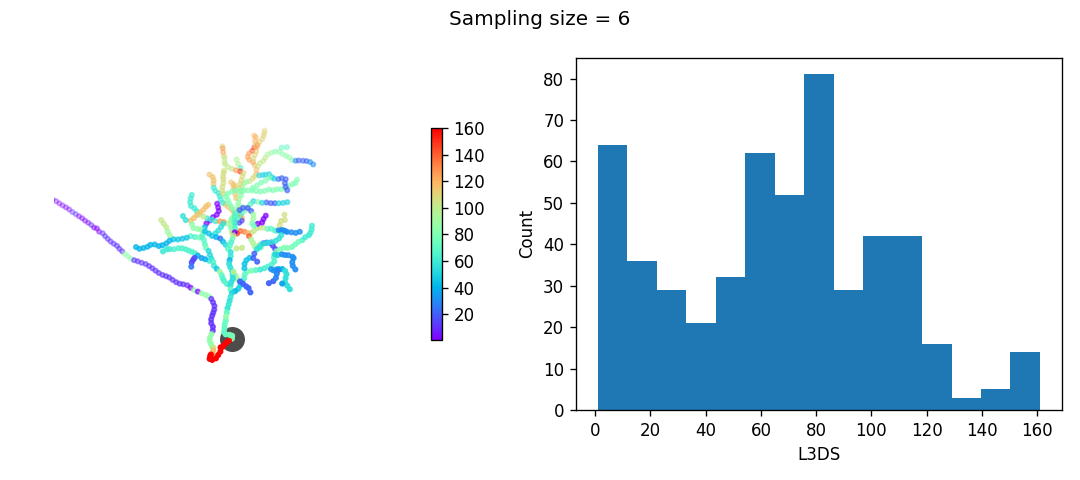

<IPython.core.display.Javascript object>


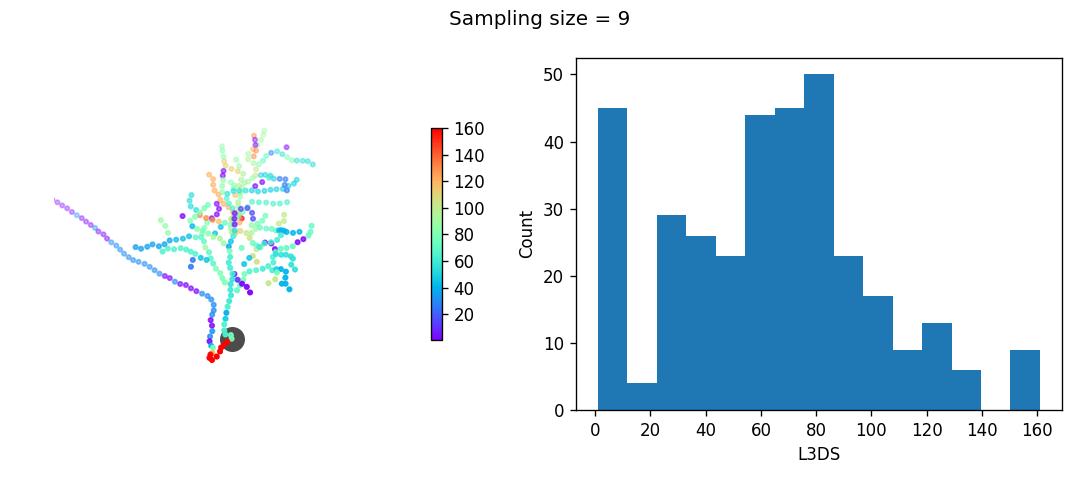

<IPython.core.display.Javascript object>


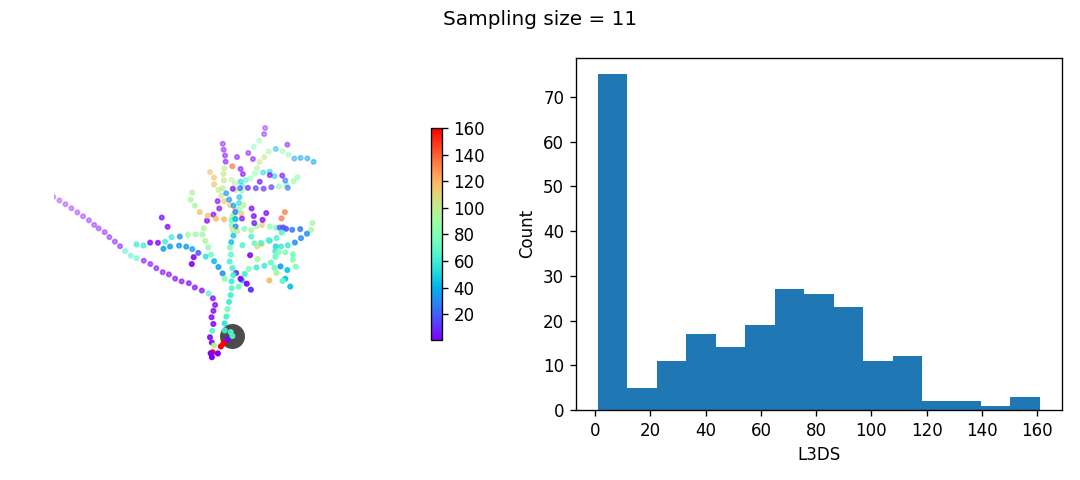

In [10]:
for ssize in ssize_lst:
    
    # Resampling
    newneuron = neuron_pruned.resample(unit_length=ssize,spline_order=2,decompose_method="spine")

    # Compute local 3D scale
    df = newneuron.compute_local_3d_scale(r_lst,dim_param,"leaf")
    meandf = df.groupby("nodeid")["local_scale"].mean()
    local_scale = meandf.values
    
    fig = plt.figure(figsize=(9,4))
    ax = fig.add_subplot(121,projection='3d')

    rootcoors = newneuron.get_coordinates(newneuron.get_root()).values
    coors = newneuron.get_coordinates(meandf.index.values).values

    pl = ax.scatter(coors[:,0],
                    coors[:,1],
                    coors[:,2],
                    c=local_scale,s=7,cmap="rainbow",vmin=rmin,vmax=rmax)

    clb = fig.colorbar(pl,shrink=0.6);
    clb.set_ticks(range(0,rmax+1,20))

    ax.plot(rootcoors[:,0],
            rootcoors[:,1],
            rootcoors[:,2],'o',
            c="black",ms=15,markeredgewidth=0.,alpha=0.7)

    para = mypl.fix_equal_axis(coors)
    ax.set_xlim(para["xmin"],para["xmax"]);
    ax.set_ylim(para["ymin"],para["ymax"]);
    ax.set_zlim(para["zmin"],para["zmax"]);
    ax.view_init(azim=-83,elev=57)
    ax.dist = 8
    ax.axis("off");

    ax = fig.add_subplot(122)
    ax.hist(local_scale,bins=15);
    ax.set_xlabel('L3DS');
    ax.set_ylabel('Count');
    
    plt.suptitle('Sampling size = {}'.format(ssize))
    plt.tight_layout();
    fig.savefig('../localfiles/figures/validation/sampling_size_effect/neuron/ssize_{}.png'.format(ssize),dpi=300)